In [1]:
sequence_key = 'p7s1'
camera_number = 1
calibraton_file_path = f"gait3d\\Sequences\\{sequence_key}\\Calibration\\c{camera_number}.xml"
calibraton_file_path

'gait3d\\Sequences\\p7s1\\Calibration\\c1.xml'

In [2]:
with open(calibraton_file_path) as file:
    xml_calibration_config = file.read()
    print(xml_calibration_config)

<?xml version="1.0" encoding="UTF-8"?>
<Camera name="c1">
	<Geometry width="960" height="540" ncx="9.600000e+002" nfx="9.600000e+002" dx="1.000000e+000" dy="1.000000e+000" dpx="1.000000e+000" dpy="1.000000e+000"/>
	<Intrinsic focal="5.561470e+002" kappa1="2.720130e-007" cx="4.800000e+002" cy="2.700000e+002" sx="1.001630e+000"/>
	<Extrinsic tx="2.564550e+001" ty="6.130300e+002" tz="3.444080e+003" rx="-3.121731e+000" ry="1.353192e+000" rz="1.582054e+000"/>
</Camera>



In [3]:
import xml.etree.ElementTree as ET

tree = ET.parse(calibraton_file_path)
root = tree.getroot()

geometry = root.find('Geometry')
intrinsic = root.find('Intrinsic')
extrinsic = root.find('Extrinsic')

width = int(geometry.get('width'))
height = int(geometry.get('height'))

focal_length = float(intrinsic.get('focal'))
k = float(intrinsic.get('kappa1'))

cx = float(intrinsic.get('cx'))
cy = float(intrinsic.get('cy'))

sx = float(intrinsic.get('sx'))

tx = float(extrinsic.get('tx'))
ty = float(extrinsic.get('ty'))
tz = float(extrinsic.get('tz'))

rx = float(extrinsic.get('rx'))
ry = float(extrinsic.get('ry'))
rz = float(extrinsic.get('rz'))

dx = float(geometry.get('dx'))
dy = float(geometry.get('dy'))
dpx = float(geometry.get('dpx'))
dpy = float(geometry.get('dpy'))

print(f"{cx = } {cy = }")
print(f"{sx = }")
print(f"{tx = } {ty = } {tz = }")
print(f"{rx = } {ry = } {rz = }")
print(f"{dx = } {dy = } {dpx = } {dpy = }")

cx = 480.0 cy = 270.0
sx = 1.00163
tx = 25.6455 ty = 613.03 tz = 3444.08
rx = -3.121731 ry = 1.353192 rz = 1.582054
dx = 1.0 dy = 1.0 dpx = 1.0 dpy = 1.0


In [4]:
import numpy as np
import cv2

camera_matrix = np.array([
    [focal_length, 0, cx],
    [0, focal_length, cy],
    [0, 0, 1]
])

#k1 k2 p1 p2 k3 - assume all except k1 equals 0
distortion_coefficients = np.array([k, 0, 0, 0, 0])

translation_vector = np.array([[tx], [ty], [tz]])
rotation_vector = np.array([rx, ry, rz])
rotation_matrix, _ = cv2.Rodrigues(rotation_vector)

In [5]:
camera_matrix

array([[556.147,   0.   , 480.   ],
       [  0.   , 556.147, 270.   ],
       [  0.   ,   0.   ,   1.   ]])

In [6]:
rotation_vector

array([-3.121731,  1.353192,  1.582054])

In [7]:
rotation_matrix

array([[ 0.43996824, -0.30409532, -0.84495798],
       [-0.78761218, -0.582669  , -0.2004093 ],
       [-0.43138729,  0.75367292, -0.49586503]])

In [8]:
translation_vector

array([[  25.6455],
       [ 613.03  ],
       [3444.08  ]])

In [9]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
sample_image = cv2.imread(sample_img_path)
undistorted_image = cv2.undistort(sample_image, camera_matrix, distortion_coefficients)

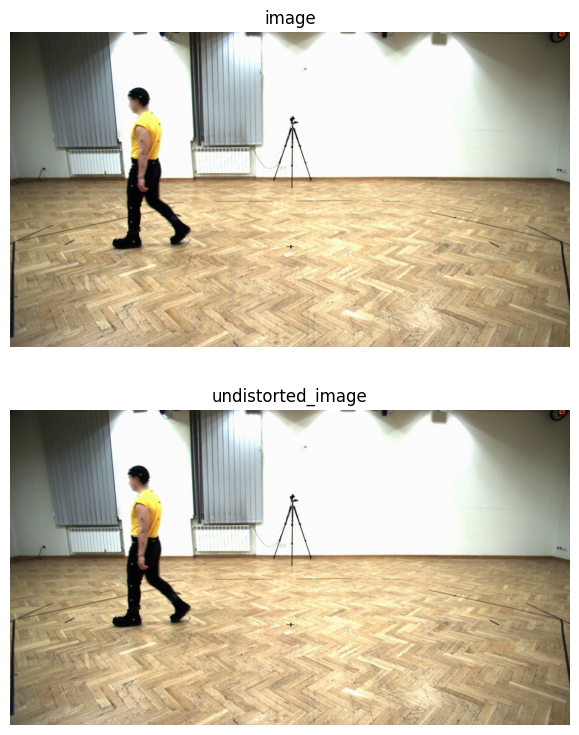

In [10]:
import matplotlib.pyplot as plt

def show_images(image, undistorted_image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    undistorted_image_rgb = cv2.cvtColor(undistorted_image, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(16, 9))
    plt.subplot(2, 1, 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("image")
    
    plt.subplot(2, 1, 2)
    plt.imshow(undistorted_image_rgb)
    plt.axis('off')
    plt.title("undistorted_image")
    
    plt.show()

show_images(sample_image, undistorted_image)

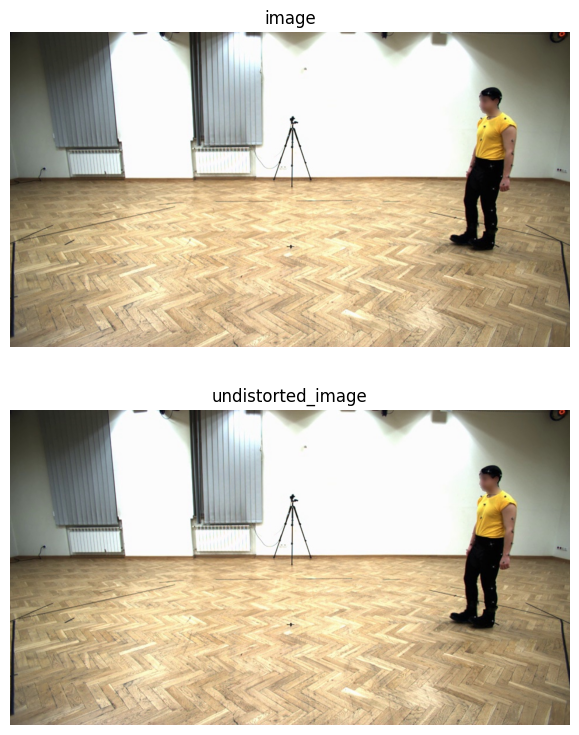

In [11]:
sample_img_path = './sample_imgs/c1_0090_10.jpg'
sample_image_2 = cv2.imread(sample_img_path)
undistorted_image_2 = cv2.undistort(sample_image_2, camera_matrix, distortion_coefficients)
cv2.imwrite('./sample_imgs/c1_0090_10_undistorted.jpg', undistorted_image_2)
show_images(sample_image_2, undistorted_image_2)

In [12]:
# bolow caluculation based on formulas from 
# https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/DIAS1/

from math import cos, sin
import numpy as np

# assuming rx, ry, rz in radians and no convertion is needed

r1 = cos(ry) * cos(rz)
r2 = cos(rz) * sin(rx) * sin(ry) - cos(rx) * sin(rz)
r3 = sin(rx) * sin(rz) + cos(rx) * cos(rz) * sin(ry)
r4 = cos(ry) * sin(rz)
r5 = sin(rx) * sin(ry) * sin(rz) + cos(rx) * cos(rz)
r6 = cos(rx) * sin(ry) * sin(rz) - cos(rz) * sin(rx)
r7 = - sin(ry)
r8 = cos(ry) * sin(rx)
r9 = cos(rx) * cos(ry)

R = np.array([[r1, r2, r3], [r4, r5, r6], [r7, r8, r9]])
print(R)

T = np.array([tx, ty, tz])
print(T)

[[-0.00243038  0.99995771 -0.0088693 ]
 [ 0.21587739 -0.00813555 -0.97638659]
 [-0.97641746 -0.00428767 -0.21584849]]
[  25.6455  613.03   3444.08  ]


In [13]:
world_coordinates = np.array([0, 0, 0]).T
image_coordinates = R @ world_coordinates + T
print(image_coordinates)

[  25.6455  613.03   3444.08  ]


In [16]:
import c3d
import json
import itertools
from scripts.parsers import parse_sequences


sequence_key = 'p7s1'
file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(json.dumps(sequences[sequence_key], indent=4))

{
    "start_frame": 90,
    "number_of_frames": 120,
    "frame_offset": 0,
    "MoCap_data": true
}


In [172]:
s1_frame_num = (90 + sequences[sequence_key]["start_frame"]) * 4 - 2
s2_frame_num = (10 + sequences[sequence_key]["start_frame"]) * 4
# 90 and 10 are known values (taken from file name, image extracted in one of previous notebooks)

In [173]:
sample_c3d_path = f'gait3d\\Sequences\\{sequence_key}\\MoCap\\{sequence_key}.c3d'
markers_number = 39

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    s1_frame = next(itertools.islice(reader.read_frames(), s1_frame_num, None))[1][:markers_number, :3]

with open(sample_c3d_path, 'rb') as handle:
    reader = c3d.Reader(handle)
    s2_frame = next(itertools.islice(reader.read_frames(), s2_frame_num, None))[1][:markers_number, :3]

In [174]:
s1_frame.shape

(39, 3)

In [175]:
s2_frame.shape

(39, 3)

In [176]:
s1_frame[0].reshape((3, 1))

array([[  -45.623726],
       [-1626.0376  ],
       [ 1608.7539  ]], dtype=float32)

In [177]:
s2_frame[0]

array([  54.07066, 1932.0845 , 1603.6761 ], dtype=float32)

In [178]:
s1_image_coordinates = R @ s1_frame[0].reshape((3, 1)) + T.reshape((3, 1))
s1_image_coordinates

array([[-1614.48097759],
       [ -954.3561617 ],
       [ 3148.35262239]])

In [179]:
s1_image_coordinates = R @ s1_frame[0] + T
s1_image_coordinates

array([-1614.48097759,  -954.3561617 ,  3148.35262239])

In [180]:
s2_image_coordinates = R @ s2_frame[0] + T
s2_image_coordinates

array([1943.2933731 , -956.82380973, 3036.84925147])

In [181]:
xi, yi, zi = s1_image_coordinates[0], s1_image_coordinates[1], s1_image_coordinates[2]

xu = focal_length * xi/zi
yu = focal_length * yi/zi

print(f"{xu = }, {yu = }")

xu = -285.19319781937475, yu = -168.58413904643268


In [182]:
from math import sqrt

# some mismatch in formulas
r = sqrt(xu ** 2 + yu ** 2)
xd = xu * (1 - k * r ** 2)
yd = yu * (1 - k * r ** 2)

print(f"{r = }")
print(f"{xd = }, {yd = }")

r = 331.2940869083962
xd = -276.6787558069307, yd = -163.55106011220875


In [183]:
xf = (sx * xd)/dx + cx
yf = yd/dy + cy
print(f"{xf = }, {yf = }")

xf = 202.87025782110396, yf = 106.44893988779125


(202, 106)


Text(0.5, 1.0, 'image with calculated point')

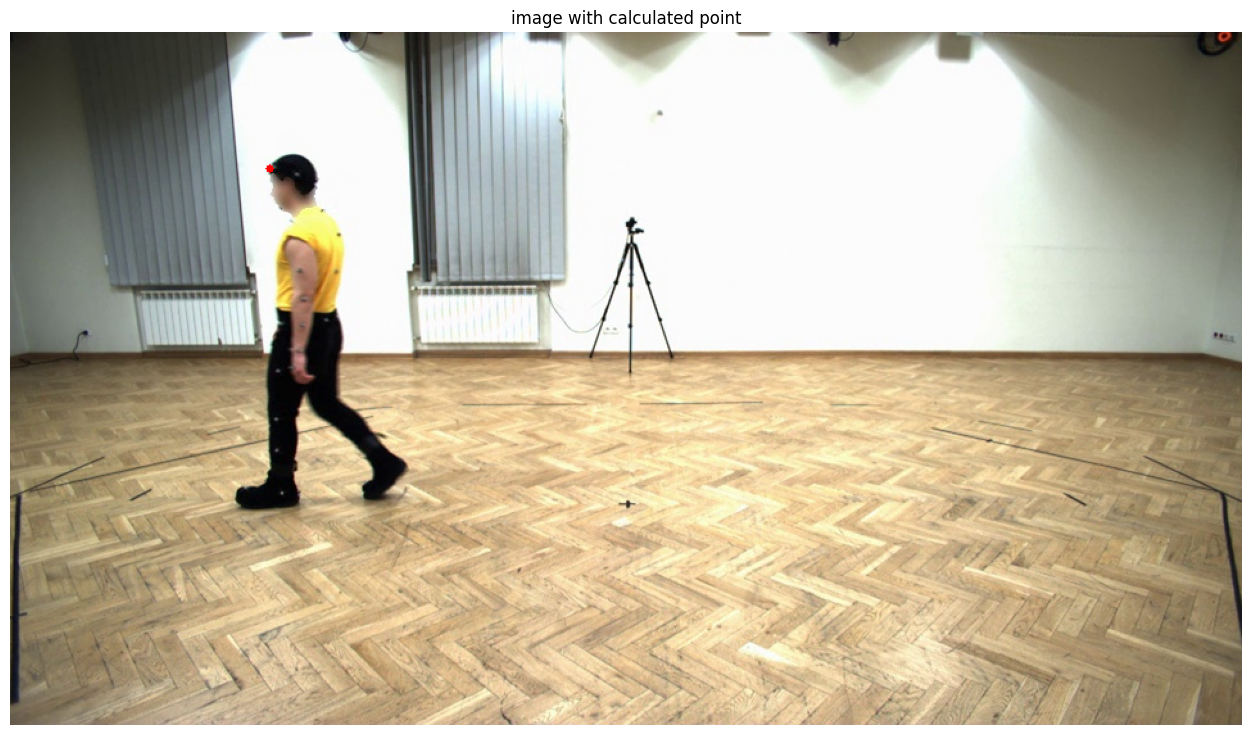

In [184]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
sample_image = cv2.imread(sample_img_path)

height, width, _ = sample_image.shape

dot_color = (0, 0, 255)
dot_radius = 3 
dot_thickness = -1  # for solid circle
dot_center = (int(xf), int(yf))
print(dot_center)
cv2.circle(sample_image, dot_center, dot_radius, dot_color, dot_thickness)

plt.figure(figsize=(16, 9))
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)
plt.axis('off')
plt.title("image with calculated point")


In [185]:
s1_image_coordinates_all = (R @ s1_frame.T + np.array([T for _ in range(markers_number)]).T)
s1_image_coordinates_all

array([[-1614.48097759, -1610.09721618, -1495.68712591, -1493.01559033,
        -1418.22266493, -1370.02882356, -1601.72815364, -1636.93706242,
        -1369.7617855 , -1486.18438923, -1439.89993696, -1423.90369668,
        -1429.35191399, -1507.0755457 , -1447.49144426, -1494.61765745,
        -1540.75689535, -1519.65213609, -1550.92382679, -1640.064992  ,
        -1734.08498811, -1688.48900996, -1773.00861222, -1594.59090413,
        -1619.65412936, -1406.94102225, -1406.63964436, -1613.87393177,
        -1660.50595606, -1674.45092608, -1690.72390412, -1634.34514895,
        -1889.90589289, -1597.04385746, -1531.79069331, -1402.53293565,
        -1181.11393693, -1143.01979961, -1341.39637333],
       [ -954.3561617 ,  -964.04320241,  -915.65158752,  -943.10903516,
         -776.61745544,  -502.59589465,  -653.17782806,  -522.56206259,
         -681.33089291,  -693.59832798,  -468.42123565,  -347.61529432,
         -234.14129325,  -128.13900215,  -121.81165936,   -46.2879676 ,
       

In [186]:
xi, yi, zi = s1_image_coordinates_all[0], s1_image_coordinates_all[1], s1_image_coordinates_all[2]

xu = focal_length * xi/zi
yu = focal_length * yi/zi

In [187]:
xu

array([-285.19319782, -272.33242437, -265.25549275, -251.83157994,
       -242.34933592, -230.24332968, -272.17437137, -275.06881853,
       -228.1152017 , -268.08234946, -262.26427814, -257.54159725,
       -258.38716113, -267.80245682, -260.75202937, -267.7696671 ,
       -249.36770892, -237.59256658, -239.09196158, -251.3915292 ,
       -269.40648267, -257.98749836, -271.36541068, -275.58421842,
       -257.49890561, -238.15198082, -228.82821202, -277.88132768,
       -278.97150277, -278.26922356, -273.55820888, -259.06483791,
       -304.0825477 , -247.0414699 , -234.98599043, -214.09668335,
       -181.23242487, -178.52865083, -205.24738963])

In [188]:
yu

array([-168.58413905, -163.05861527, -162.3879813 , -159.07713216,
       -132.71027833,  -84.46490342, -110.99153395,  -87.81066326,
       -113.46639664, -125.11332422,  -85.31853783,  -62.87321139,
        -42.32624833,  -22.76988681,  -21.94322979,   -8.29276545,
       -124.4343157 ,  -96.34870335,  -73.81197556,  -62.97370866,
        -49.9635561 ,  -46.027796  ,  -41.15467552,  -43.1935332 ,
        -47.05131169,  -45.85081689,  -48.55576581,   -5.7711376 ,
         32.77784421,   57.59345998,   91.66175716,   92.48280975,
         88.38189958,  -11.48392568,   18.66353458,   34.22009473,
         62.27006878,   60.11415127,   81.90719572])

In [189]:
r = np.sqrt(xu ** 2 + yu ** 2)
xd = xu * (1 - k * r ** 2)
yd = yu * (1 - k * r ** 2)

In [190]:
xd

array([-276.67875581, -264.86884315, -258.27611462, -245.7538096 ,
       -237.31649345, -226.47641563, -265.77789759, -268.8306169 ,
       -224.0874442 , -261.70011751, -256.83808278, -252.61810547,
       -253.56876512, -262.54032581, -255.89537147, -262.54221406,
       -244.09938033, -233.3443373 , -235.01984358, -246.79877818,
       -263.90474294, -253.16808705, -265.80471922, -269.75121145,
       -252.69959   , -234.34168224, -225.42220593, -272.042105  ,
       -272.98430398, -272.15696813, -267.36450463, -253.73261327,
       -295.78814922, -242.93151822, -231.4342062 , -211.35905107,
       -179.42208217, -176.80536641, -202.52091801])

In [191]:
yd

array([-163.55106011, -158.58980762, -158.11524367, -155.23792234,
       -129.95429832,  -83.08300875, -108.38307955,  -85.81923208,
       -111.4629566 , -122.13475343,  -83.55331437,  -61.67124735,
        -41.53694973,  -22.32247446,  -21.5345244 ,   -8.13087243,
       -121.80542335,  -94.62595845,  -72.55483972,  -61.82322215,
        -48.94321509,  -45.16796023,  -40.3113534 ,  -42.27930022,
        -46.17436002,  -45.11722945,  -47.83303485,   -5.64986656,
         32.07437641,   56.32840475,   89.58641891,   90.57927424,
         85.97112428,  -11.2928712 ,   18.38143756,   33.78252589,
         61.64804893,   59.5338871 ,   80.81915438])

In [192]:
xf = (sx * xd)/dx + cx
yf = yd/dy + cy

In [193]:
xf

array([202.87025782, 214.69942064, 221.30289531, 233.84561169,
       242.29668067, 253.15442782, 213.78888443, 210.73118919,
       255.54729327, 217.8733113 , 222.74327114, 226.97012701,
       226.01791779, 217.03173345, 223.68751908, 217.02984213,
       235.50273768, 246.27531143, 244.59707407, 232.79893981,
       215.66509233, 226.41924897, 213.76201909, 209.80909408,
       226.88850967, 245.27634082, 254.21035587, 207.51446637,
       206.57073161, 207.39941601, 212.19969123, 225.85380257,
       183.7297161 , 236.67250341, 248.18855604, 268.29643368,
       300.28545984, 302.90644084, 277.14897289])

In [194]:
yf

array([106.44893989, 111.41019238, 111.88475633, 114.76207766,
       140.04570168, 186.91699125, 161.61692045, 184.18076792,
       158.5370434 , 147.86524657, 186.44668563, 208.32875265,
       228.46305027, 247.67752554, 248.4654756 , 261.86912757,
       148.19457665, 175.37404155, 197.44516028, 208.17677785,
       221.05678491, 224.83203977, 229.6886466 , 227.72069978,
       223.82563998, 224.88277055, 222.16696515, 264.35013344,
       302.07437641, 326.32840475, 359.58641891, 360.57927424,
       355.97112428, 258.7071288 , 288.38143756, 303.78252589,
       331.64804893, 329.5338871 , 350.81915438])

(203, 106)
(215, 111)
(221, 112)
(234, 115)
(242, 140)
(253, 187)
(214, 162)
(211, 184)
(256, 159)
(218, 148)
(223, 186)
(227, 208)
(226, 228)
(217, 248)
(224, 248)
(217, 262)
(236, 148)
(246, 175)
(245, 197)
(233, 208)
(216, 221)
(226, 225)
(214, 230)
(210, 228)
(227, 224)
(245, 225)
(254, 222)
(208, 264)
(207, 302)
(207, 326)
(212, 360)
(226, 361)
(184, 356)
(237, 259)
(248, 288)
(268, 304)
(300, 332)
(303, 330)
(277, 351)


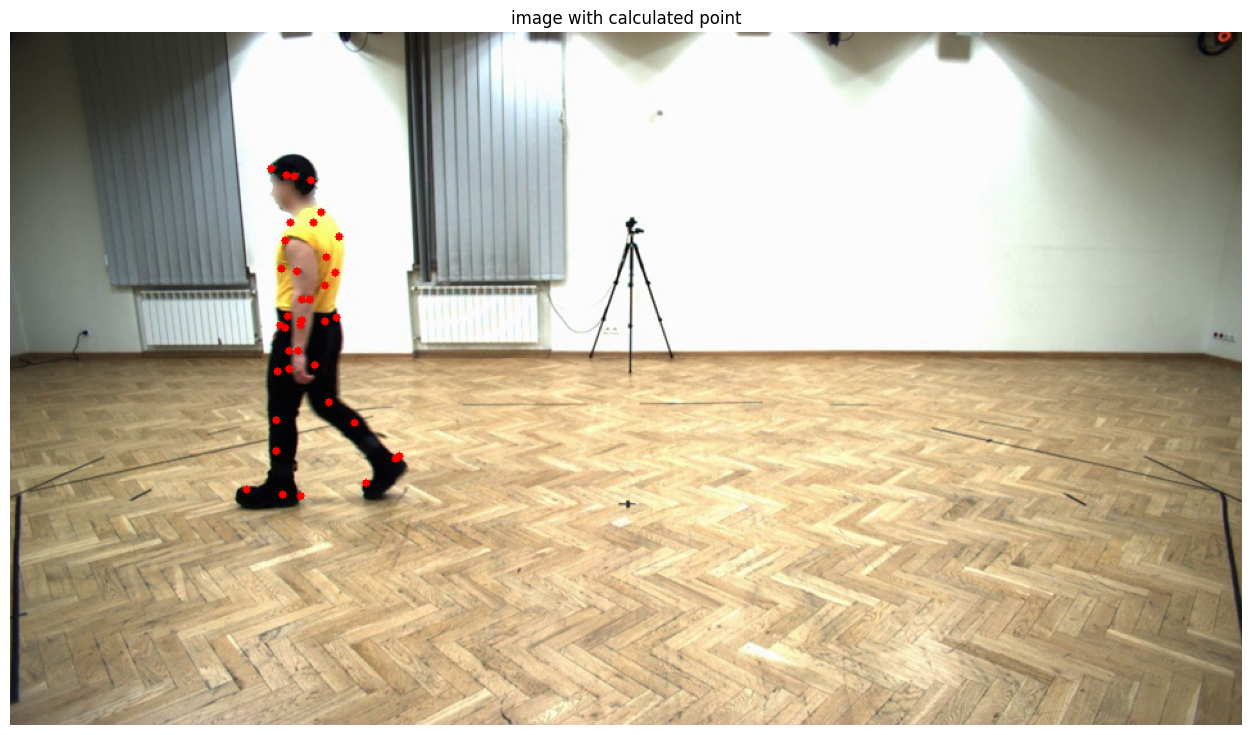

In [195]:
sample_img_path = './sample_imgs/c1_0090_90.jpg'
sample_image = cv2.imread(sample_img_path)

height, width, _ = sample_image.shape

for i in range(markers_number):
    dot_color = (0, 0, 255)
    dot_radius = 3 
    dot_thickness = -1  # for solid circle
    dot_center = (round(xf[i]), round(yf[i]))
    print(dot_center)
    cv2.circle(sample_image, dot_center, dot_radius, dot_color, dot_thickness)

plt.figure(figsize=(16, 9))
sample_image_rgb = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_image_rgb)
plt.axis('off')
plt.title("image with calculated point")
plt.show()

In [170]:
round(1.99)

2